In [2]:
import pandas as pd
import bokeh
from bokeh.charts import BoxPlot

In [8]:
matrix = pd.read_csv("price_againt_leafs.csv")

In [9]:
matrix.head(5)

,Unnamed: 0,run 1,run 2,run 3,run 4,run 5,run 6,run 7,run 8,run 9,run 10,mean,std,95% confidence interval
0,max_leaf_nodes = 50,7.375,7.218,7.126,7.236,7.294,7.349,7.267,7.317,7.207,7.291,7.2680,0.070019,"[7.254,7.282 ]"
1,max_leaf_nodes = 100,7.104,7.087,7.222,7.172,7.211,7.207,7.172,7.329,7.153,7.181,7.1838,0.063870,"[7.171,7.196 ]"
2,max_leaf_nodes = 150,7.108,7.211,7.278,7.109,7.326,6.889,7.124,7.092,7.172,7.167,7.1476,0.112873,"[7.125,7.17 ]"
3,max_leaf_nodes = 200,7.254,7.223,7.183,7.176,7.162,7.265,7.198,7.231,7.145,7.256,7.2093,0.040299,"[7.201,7.217 ]"
4,max_leaf_nodes = 250,7.259,7.154,7.045,7.369,7.114,7.372,7.280,7.269,7.175,7.182,7.2219,0.101231,"[7.202,7.242 ]"


In [10]:
col = matrix.columns[1:-3]

In [11]:
col

Index(['run 1', 'run 2', 'run 3', 'run 4', 'run 5', 'run 6', 'run 7', 'run 8',
       'run 9', 'run 10'],
      dtype='object')

In [56]:
transposed = matrix[col].transpose()
indices = transposed.columns
t = (transposed - 7.15) ** 2

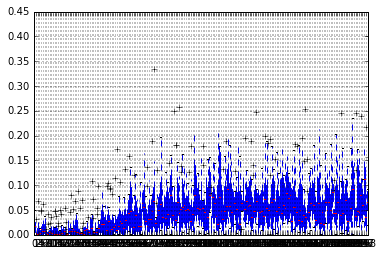

In [100]:
t.columns[0:20]

RangeIndex(start=0, stop=20, step=1)

In [103]:
x_axis = [i for i in range(50, 1000, 50)]

In [5]:
import plotly.graph_objs as go
from plotly.plotly import iplot
import plotly.plotly as py
import plotly

In [132]:
data = [go.Box(y=t[i], name = '{}'.format( (50 * (i + 1)) / 10000)) for i in t.columns[0:50]]

In [6]:
plotly.tools.set_credentials_file(username='MajdiRabia', api_key='2aDlg90iKqS8ffNRzMuW')
py.sign_in('MajdiRabia', '2aDlg90iKqS8ffNRzMuW')

In [129]:
t.columns

RangeIndex(start=0, stop=199, step=1)

In [134]:
iplot(data, title='MSE against N_sim/RF_max_leaf_nodes')

In [ ]:

import numpy as np
y0 = np.random.randn(50)-1
y1 = np.random.randn(50)+1

trace0 = go.Box(
    y=y0
)
trace1 = go.Box(
    y=y1
)
data = [trace0, trace1]
iplot(data)

In [72]:
transposed.head(5)

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
run 1,7.375,7.104,7.108,7.254,7.259,7.239,7.347,7.220,7.232,7.068,...,7.515,7.238,7.646,7.567,7.562,7.359,7.431,7.280,7.269,7.400
run 2,7.218,7.087,7.211,7.223,7.154,7.194,7.185,7.089,7.000,7.231,...,7.177,7.408,7.326,7.371,7.333,7.129,7.318,7.492,7.179,7.397
run 3,7.126,7.222,7.278,7.183,7.045,7.088,7.152,7.260,7.094,7.223,...,7.526,7.521,7.321,7.555,7.422,7.387,7.397,7.534,7.352,7.315
run 4,7.236,7.172,7.109,7.176,7.369,7.017,7.241,7.054,7.226,7.124,...,7.605,7.438,7.249,7.371,7.311,7.410,7.349,7.484,7.617,7.415
run 5,7.294,7.211,7.326,7.162,7.114,7.128,7.227,7.111,7.173,7.103,...,7.455,7.264,7.328,7.285,7.200,7.489,7.485,7.381,7.376,7.365


-1

In [139]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../../Main'))
if module_path not in sys.path:
    sys.path.append(module_path)
from BSDE import *
import warnings 
import bokeh
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_notebook, show, output_file
import time
warnings.filterwarnings("ignore")

In [140]:
T = 0.5
K = 100.
r = 0.04
R = 0.06
p = 7
M = np.eye(p)
S_init = 100.
mu = 0.06
sigma = 0.2
Q = 0

In [141]:
N = 10
m = 6
RF_n_trees = 10
RF_max_leaf_nodes = 4
M_run = 20
n_picard = 3

In [143]:
test = BsdeHD(T, K, M, mu, Q, sigma, S_init, r, R)
test.get_price(N, m, option_type='call', option_payoff='geometric',
               oType='European',n_picard=n_picard, RF_n_estimators = RF_n_trees, RF_max_leaf_nodes=RF_max_leaf_nodes)

1.7196674562591623

In [144]:
matrix_b = pd.read_csv("price_against_leafs_1000.csv")

In [3]:
matrix_c = pd.read_csv("price_against_leafs_100000.csv")

In [146]:
matrix_b.head(3)

,Unnamed: 0,run 1,run 2,run 3,run 4,run 5,run 6,run 7,run 8,run 9,run 10
0,max_leaf_nodes = 50,7.2335,6.9957,7.1447,7.2455,7.3545,6.9703,7.3776,7.1871,7.2942,7.2261
1,max_leaf_nodes = 100,7.2660,7.0850,7.0801,7.2638,7.2713,7.2112,7.1262,7.2811,7.1605,7.1499
2,max_leaf_nodes = 150,7.3051,7.3380,6.9833,7.3790,7.1251,7.2276,7.1376,7.1604,7.1757,7.2547


In [12]:
col = matrix.columns[1:-3]

In [150]:
transposed_b = matrix_b[col].transpose()

In [13]:
transposed_c = matrix_c[col].transpose()

In [153]:
transposed_b = (transposed_b - 7.15) ** 2

In [14]:
transposed_c = (transposed_c - 7.15) ** 2

In [162]:
data_b = [go.Box(y=transposed_b[i], name = '{}'.format( (50 * (i + 1)) / 1000)) for i in transposed_b.columns[0:20]]

In [163]:
iplot(data_b, title='MSE against N_sim/RF_max_leaf_nodes with N = 1000')

In [17]:
data_c = [go.Box(y=transposed_c[i], name = '{}'.format( (1000 * (i + 1)) / 100000)) for i in transposed_c.columns]

In [18]:
iplot(data_c, title='MSE against N_sim/RF_max_leaf_nodes with N = 100000')